In [37]:
import scanpy as sc
import pandas
import matplotlib.pyplot as plt

In [2]:
adata = sc.read_h5ad('./data/pan_cancer_treg.h5ad')

In [47]:
from gseapy import Biomart
bm = Biomart()
# note the dataset and attribute names are different
m2h = bm.query(dataset='mmusculus_gene_ensembl',
               attributes=['ensembl_gene_id','external_gene_name',
                           'hsapiens_homolog_ensembl_gene',
                           'hsapiens_homolog_associated_gene_name'])

m2h_d = {}
for i,r in m2h.iterrows():
    if r['hsapiens_homolog_associated_gene_name'] is None: continue
    m2h_d[r['external_gene_name']] = r['hsapiens_homolog_associated_gene_name']

hotspot_mouse_genes_1 = ['Ikzf2', 'Il1rl1', 'Gata3', 'Rel', 'Tox', 'Flnb', 'Tnfrsf9', 'Nfkb1',
       'Tent5a', 'Tmtc2', 'Epas1', 'Rora', 'Il18rap', 'Klrg1', 'Cd83', 'Mgat5',
       'Dgat2', 'Swap70', 'Myo1e', 'Ikzf4', 'Tspan13', 'Dusp10', 'Pdcd1',
       'Gm28112', 'Stat4', 'Pcgf5']

hotspot_mouse_genes_2 = ['Pkp4', 'Zbtb46', 'Ly75', 'Itgb8', 'Ttn', 'Pcyt1a', 'Gda', 'Il2ra',
       'Uap1', 'Zc3h12c', 'Il18r1', 'Epb41l2', 'Traf3', 'Cep85l', 'Rbpj',
       'Stat1', 'Itgav', 'Ankrd33b', 'Bcl2l1', 'Fam129a', 'Ttc39c', 'Ap3b1',
       'Ppp1r16b', 'Myo10', 'Apaf1', 'Itga4', 'Rnf157', 'Nrip1']
hotspot_mouse_genes_Il10 = ['Il10', 'Maf', 'Ctla4', 'Ccr2', 'Nckap5', 'Ece1', 'Zeb2', 'Itm2b',
       'Ikzf3', 'Rabgap1l', 'Icos', 'Havcr2', 'Gzmb', 'Lag3', 'Gm36975', 'Neb',
       'Gas2', 'Cytip', 'Galnt2', 'Ccr5', 'Il1r1', 'Pde4b', 'Gcnt2', 'Olfr60',
       'Lrrfip2', '4930503L19Rik', 'E130308A19Rik', 'Gm13481', 'Ccr1',
       'Atp10a', 'Snx9', 'Gm49890', 'Agfg1', 'Ppp1r14c', 'Tiparp', 'Il23r',
       'Matn2', 'Rgs1', 'Fmnl2', 'Phactr2', 'Farp1', 'Irak3', 'Eea1',
       'Ubash3b', 'St6galnac3', 'Lamc1', 'Got1', 'Smap2', 'Wdfy2', 'Rbm24',
       'Ston2', 'Adam12', 'Twsg1', 'Hnrnpll', 'Ets2', 'Timp2', 'Dock10',
       'Ier5l', 'Arl4c']
hotspot_mouse_genes_Il10_2 = ['Nckap5', 'Ece1', 'Zeb2', 'Rabgap1l', 'Havcr2', 'Gzmb', 'Lag3',
       'Gm36975', 'Gas2', 'Il1r1', 'Pde4b', 'Gcnt2', 'Olfr60', '4930503L19Rik',
       'Lrrfip2', 'E130308A19Rik', 'Gm13481', 'Ccr1', 'Atp10a', 'Gm49890',
       'Ppp1r14c', 'Tiparp', 'Il23r', 'Matn2', 'Farp1', 'Phactr2', 'Irak3',
       'Eea1', 'St6galnac3', 'Smap2', 'Wdfy2', 'Rbm24', 'Adam12', 'Twsg1',
       'Ets2', 'Hnrnpll', 'Timp2']

hotspot_mouse_genes_1 = [m2h_d[x] if x in m2h_d else None for x in hotspot_mouse_genes_1]
hotspot_mouse_genes_2 = [m2h_d[x] if x in m2h_d else None for x in hotspot_mouse_genes_2]
hotspot_mouse_genes = hotspot_mouse_genes_1 + hotspot_mouse_genes_2
hotspot_mouse_genes_Il10 = [m2h_d[x] if x in m2h_d else None for x in hotspot_mouse_genes_Il10]
hotspot_mouse_genes_Il10_2 = [m2h_d[x] if x in m2h_d else None for x in hotspot_mouse_genes_Il10_2]
hotspot_mouse_genes_Il10 = hotspot_mouse_genes_Il10 + hotspot_mouse_genes_Il10_2

In [48]:
sc.tl.score_genes(adata, hotspot_mouse_genes_Il10, score_name='il10_pos_genes', n_bins=10) # , n_bins=20, ctrl_size=100)
sc.tl.score_genes(adata, hotspot_mouse_genes, score_name='il10_neg_genes', n_bins=10) # , n_bins=20, ctrl_size=100)

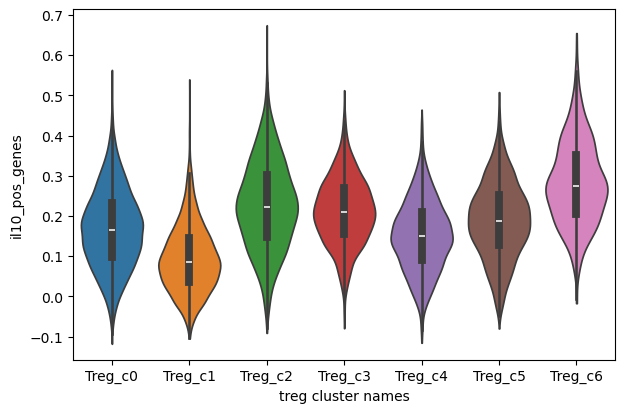

In [49]:
sc.pl.violin(adata, 'il10_pos_genes', groupby='treg_cluster_names', size=0, inner='box')

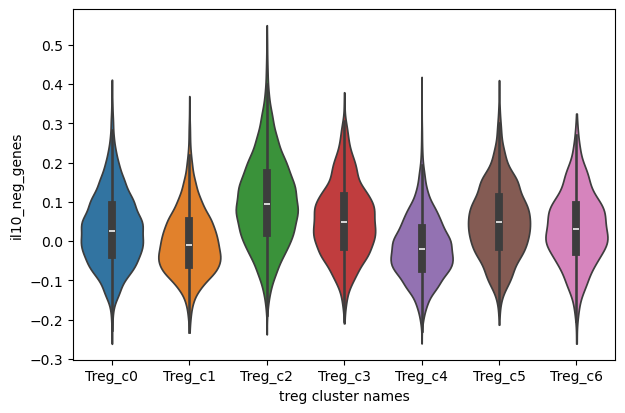

In [50]:
sc.pl.violin(adata, 'il10_neg_genes', groupby='treg_cluster_names', size=0, inner='box')

In [28]:
modules = pandas.read_csv("./data/hotspot_human_modules.csv", sep='\t', index_col=0)

In [30]:
il10_pos_genes = adata.var[adata.var_names.isin(modules[modules['Module'].isin([2, 3])].index.tolist())].index
il10_neg_genes = adata.var[adata.var_names.isin(modules[modules['Module'].isin([4, 5])].index.tolist())].index

In [31]:
sc.tl.score_genes(adata, il10_pos_genes, score_name='il10_pos_genes', use_raw=False) 
sc.tl.score_genes(adata, il10_neg_genes, score_name='il10_neg_genes', use_raw=False) 

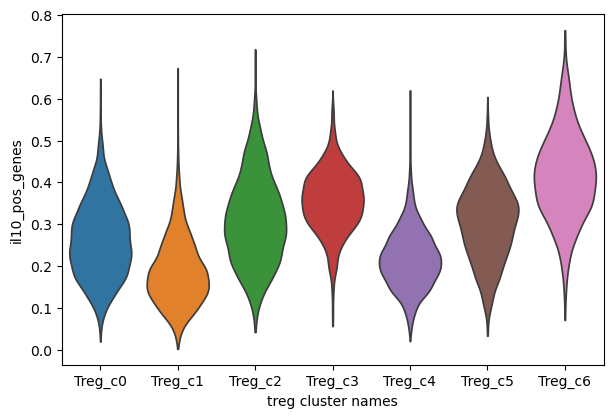

In [32]:
sc.pl.violin(adata, 'il10_pos_genes', groupby='treg_cluster_names', size=0)

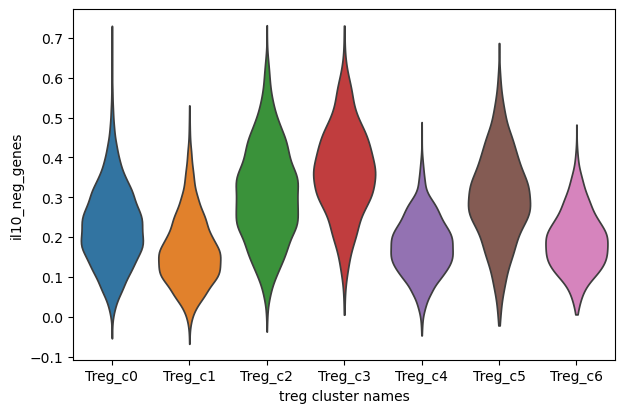

In [33]:
sc.pl.violin(adata, 'il10_neg_genes', groupby='treg_cluster_names', size=0)

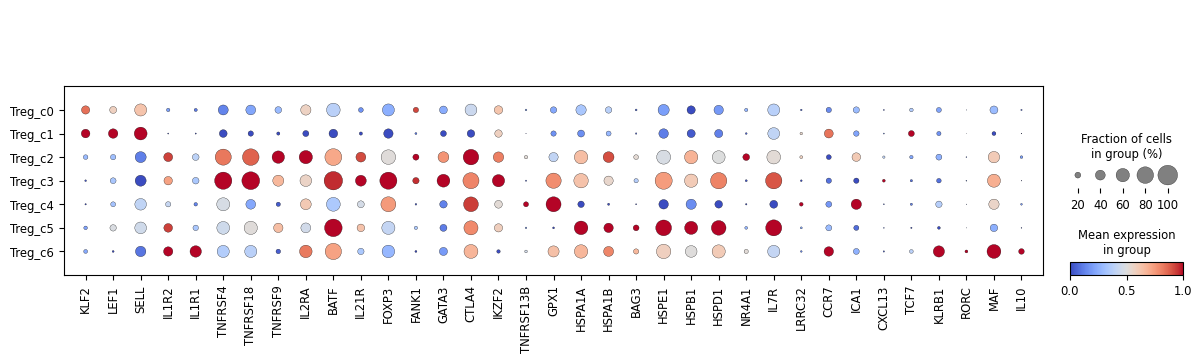

In [35]:
sc.pl.dotplot(adata, ['KLF2', 'LEF1', 'SELL', 'IL1R2', 'IL1R1', 'TNFRSF4', 'TNFRSF18', 
                           'TNFRSF9', 'IL2RA', 'BATF', 'IL21R', 'FOXP3', 'FANK1', 'GATA3', 'CTLA4', 'IKZF2', 'TNFRSF13B', 'GPX1',
                           'HSPA1A', 'HSPA1B', 'BAG3', 'HSPE1', 'HSPB1', 'HSPD1', 'NR4A1', 'IL7R', 'LRRC32', 
                           'CCR7', 'ICA1', 'CXCL13', 'TCF7', 'KLRB1', 'RORC', 'MAF', 'IL10'], groupby='treg_cluster_names',
             standard_scale='var', cmap='coolwarm')

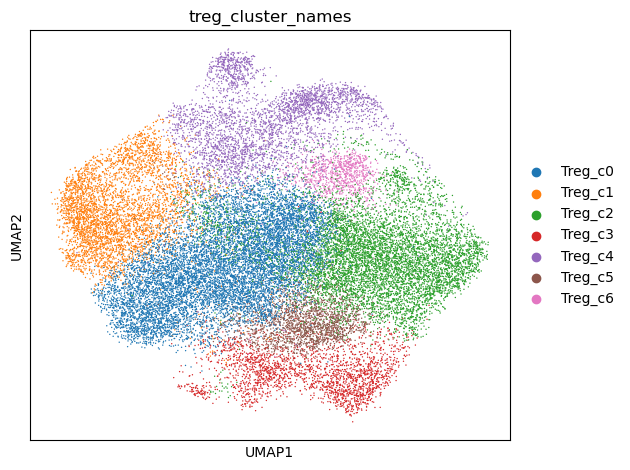

In [38]:
sc.pl.umap(adata, color='treg_cluster_names', show=False)
plt.tight_layout()

/tmp/ipykernel_1373254/388896411.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby(['treg_cluster_names', 'CancerType']).size().reset_index(name='count')


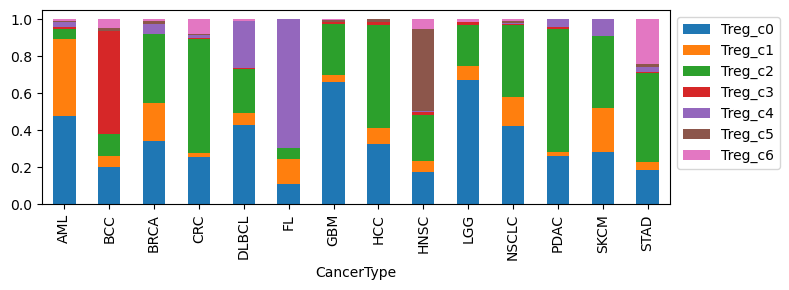

In [46]:
df = adata[adata.obs['TissueType']=='Primary tumor tissue'].obs.copy()
df = df.groupby(['treg_cluster_names', 'CancerType']).size().reset_index(name='count')
df['treg_cluster_names'] = pandas.Categorical(df['treg_cluster_names'].values.tolist())
df = df.pivot(index='CancerType', columns='treg_cluster_names', values='count')
df = df.iloc[::-1]
df_sum = df.sum(1).values.copy()
for c in df.columns:
    df[c] = df[c].values/df_sum

fig = plt.figure(figsize=(8,3))
df.iloc[::-1].plot.bar(stacked=True, ax=plt.gca()) #, color=batch_colors) # , ax=ax[1])
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
plt.tight_layout()